In [1]:
from cleanvision import Imagelab
imagelab = Imagelab(data_path="dataset/WW2020/images/")
imagelab.find_issues()

KeyboardInterrupt: 

In [3]:
imagelab.report()

No issues found.


In [2]:
import numpy as np

In [9]:
probs = np.load('dataset/WW2020/baseline/probs.npy')
labels = np.load('dataset/WW2020/baseline/labels.npy')
names = np.load('dataset/WW2020/baseline/names.npy')

In [10]:
from cleanlab.filter import find_label_issues

In [11]:
ranked_label_issues = find_label_issues(
    labels,
    probs,
    return_indices_ranked_by="self_confidence",
)

In [15]:
np.savetxt('dataset/WW2020/baseline/names_misslabels.txt', names[ranked_label_issues], fmt="%s")

In [48]:
from cleanlab.outlier import OutOfDistribution

In [49]:
ood = OutOfDistribution()

In [50]:
ood_train_predictions_scores = ood.fit_score(pred_probs=probs, labels=labels)

Fitting OOD estimator based on provided pred_probs ...


In [53]:
ood_train_predictions_scores

array([0.11022729, 0.20844883, 0.15829372, ..., 0.22552532, 0.2159388 ,
       0.21425325], dtype=float32)

In [54]:
import matplotlib.pyplot as plt

(array([  1.,   2.,   8.,  87., 398., 149., 251., 256., 163.,  17.]),
 array([0.02847499, 0.05219266, 0.07591033, 0.099628  , 0.12334567,
        0.14706334, 0.17078102, 0.19449869, 0.21821636, 0.24193403,
        0.2656517 ]),
 <BarContainer object of 10 artists>)

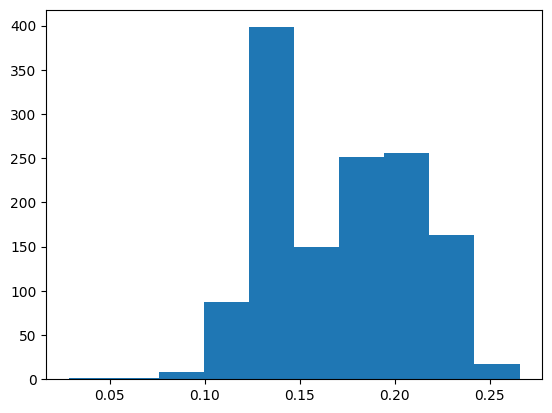

In [55]:
plt.hist(ood_train_predictions_scores)